<a href="https://colab.research.google.com/github/AryanPatial/CSCE-5218/blob/main/The_Perceptron_HW3_Patial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [4]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  55426      0 --:--:-- --:--:-- --:--:-- 55452']

In [5]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [6]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
  return sum(a * b for a, b in zip(array1, array2))
    #TODO: Return dot product of array 1 and array 2



def sigmoid(x):
  return 1 / (1 + math.exp(-x))
    #TODO: Return outpout of sigmoid function on x


# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
  return sigmoid(dot_product(weight, instance))
    #TODO: return the output of the model


# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
  return 1 if output(weights, instance) >= 0.5 else 0
    #TODO: return the prediction of the model



# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):


    #Initializing the weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:

            #Computing the weighted sum
            in_value = dot_product(weights, instance)
            #Applying the activation function
            output = sigmoid(in_value)
            #Computing the error
            error = instance[-1] - output
            #Updating weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




#Ans 1)
#If we use the second snippet inside the training phase, the weights will be updated incorrectly. Specifically, using predict() applies a step function, which results in abrupt weight updates rather than smooth, gradual learning.
#While this approach might occasionally produce the correct output, it would be due to luck rather than proper learning. The correct way is to use the sigmoid function, which squashes the dot product result into a continuous range between (0,1). This allows us to compute the derivative of the sigmoid function, enabling smooth and correct weight updates using gradient descent.
#Thus, using sigmoid() ensures stable learning, whereas predict() would lead to erratic updates and poor generalization.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [12]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]

        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)

            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



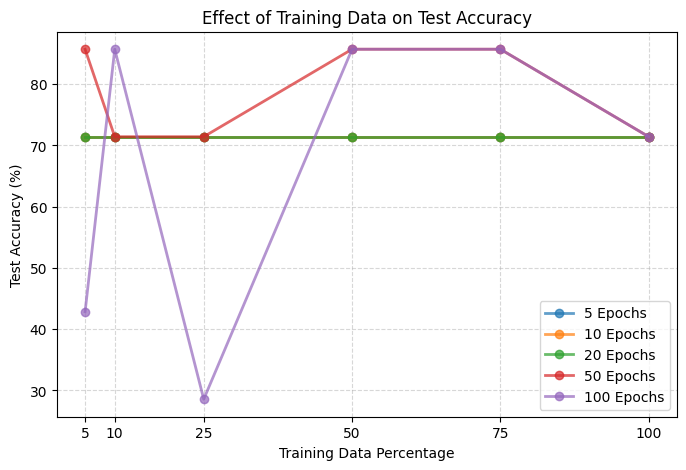

In [16]:
import matplotlib.pyplot as plt

# Read data
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = 0.01  # Fixed learning rate

# Store accuracy results
accuracy_data = {}

for epochs in num_epochs:
    accuracy_data[epochs] = []
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]

        # Train perceptron and get accuracy
        weights = train_perceptron(pre_instances, lr, epochs)
        accuracy = get_accuracy(weights, instances_te)

        accuracy_data[epochs].append(accuracy)

# Plot Training Data Percentage vs Test Accuracy
plt.figure(figsize=(8, 5))

for epochs in num_epochs:
    plt.plot(tr_percent, accuracy_data[epochs], marker='o', alpha=0.7, linewidth=2, label=f"{epochs} Epochs")

plt.xticks(tr_percent)  # Only show the training % used
plt.xlabel("Training Data Percentage")
plt.ylabel("Test Accuracy (%)")
plt.title("Effect of Training Data on Test Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)  # Light grid for clarity
plt.show()


#Ans A) No, we dont need the full training dataset to get the best results. We can still train the model on a smaller dataset with optimal learning rate and epochs which would probably give a better result than the one where model is trained over a lot of data which might result in overfitting
# Also, From the results, we can observe that increasing the training dataset size generally improves test accuracy. However, after a certain threshold (e.g., 75% or 100%), the improvement becomes marginal. This suggests that training on a smaller subset (e.g., 50-75%) may be sufficient to reach near-optimal accuracy, reducing computational cost while still achieving good generalization.



#AnsB) Although the second model was trained on more data, its learning rate (0.005) was much lower than the first one (0.050). A lower learning rate can slow down learning, preventing the model from updating weights effectively within the given 20 epochs, leading to worse accuracy.




#AnsC) We can get higher accuracy with additional hyperparamters such as :
#Weight Initialization :- Instead of starting with zero weights, different initialization methods (random, Xavier, He, etc.) can improve training.
#Regularization (L1/L2) :- Helps prevent overfitting by penalizing large weights.
#Batch Size :- Instead of updating weights after each instance, training in mini-batches can stabilize learning.
#Activation Function :- A perceptron usually has a step function, but using a non-linearity like ReLU or sigmoid (turning it into a neural network) can improve performance.


#Ans D) No, increasing the number of epochs is not always beneficial. While more epochs allow the model to learn better, excessive training can lead to overfitting, where the perceptron memorizes the training data but performs poorly on the test dataset. The optimal number of epochs depends on early stopping criteria, where training is stopped once test accuracy stops improving.

Git Repo : - https://github.com/AryanPatial/CSCE-5218